In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import folium

# Cargar el archivo CSV
# Asegúrate de subir el archivo "Estaura_peso_modificado1.csv" a Colab
file_path = '/content/drive/My Drive/Colab Notebooks/Conchita/producto3/Estaura_peso_modificado1.csv'
data = pd.read_csv(file_path)

# Limpiar la columna de 'Ubicacion' y separar en latitud y longitud
data['Ubicacion'] = data['Ubicacion'].str.strip()
data[['Latitud', 'Longitud']] = data['Ubicacion'].str.split(',', expand=True)

# Convertir las columnas de latitud y longitud a valores numéricos, manejando valores nulos
data['Latitud'] = pd.to_numeric(data['Latitud'], errors='coerce')
data['Longitud'] = pd.to_numeric(data['Longitud'], errors='coerce')

# Definir el centro del mapa en Puebla, México
map_center = [19.0414, -98.2063]

# Crear el mapa
mapa_puebla = folium.Map(location=map_center, zoom_start=10)

# Agregar marcadores al mapa
for idx, row in data.dropna(subset=['Latitud', 'Longitud']).iterrows():
    folium.Marker(
        location=[row['Latitud'], row['Longitud']],
        popup=f"Estudiante {idx + 1}",
        icon=folium.Icon(icon="info-sign")
    ).add_to(mapa_puebla)

# Mostrar el mapa
mapa_puebla


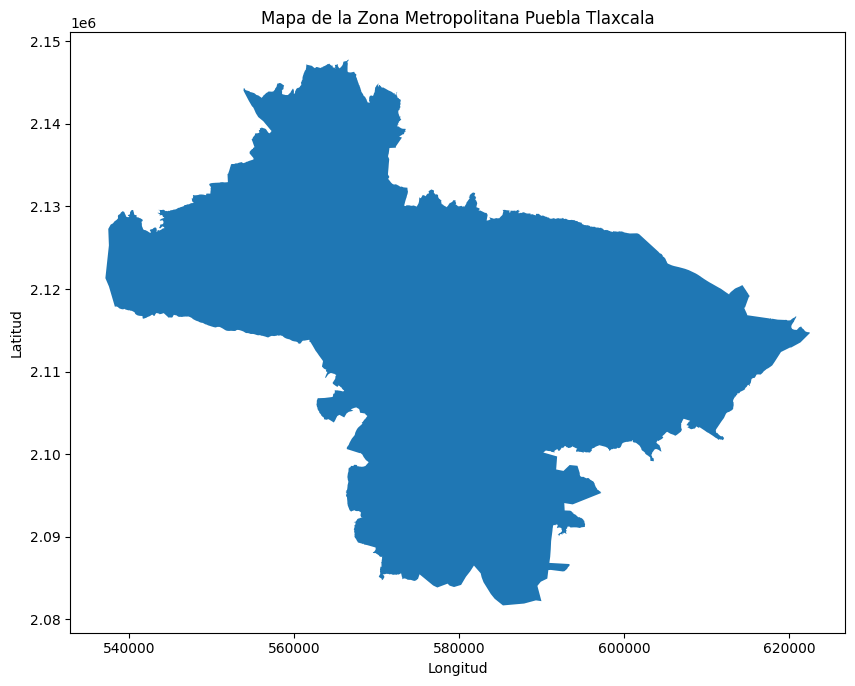

In [ ]:
# Importar las bibliotecas necesarias
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el shapefile del área de interés (por ejemplo, Puebla)
# Asegúrate de subir el archivo shapefile (.shp y otros archivos asociados) a Colab
shapefile_path = '/content/drive/My Drive/Colab Notebooks/Conchita/producto3/Limite_ZMPT.shp'
gdf = gpd.read_file(shapefile_path)

# Crear la figura y el eje
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Dibujar el mapa base
gdf.plot(ax=ax)

# Personalizar la visualización
ax.set_title("Mapa de la Zona Metropolitana Puebla Tlaxcala")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

# Mostrar el mapa
plt.show()


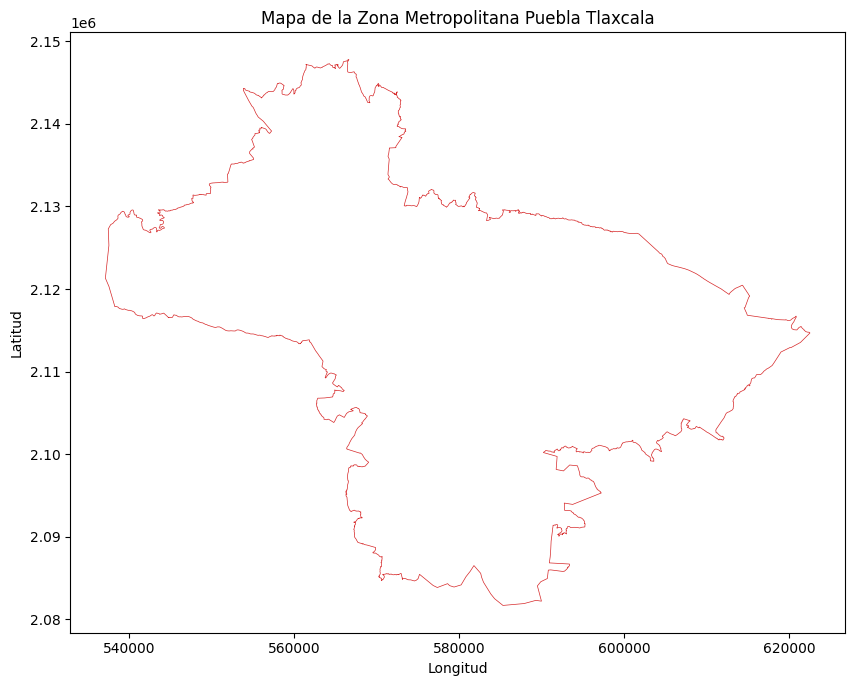

In [ ]:
# Importar las bibliotecas necesarias
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el shapefile del área de interés (por ejemplo, Puebla)
shapefile_path = '/content/drive/My Drive/Colab Notebooks/Conchita/producto3/Limite_ZMPT.shp'

# Verificar si el archivo existe
import os
if not os.path.exists(shapefile_path):
    print(f"Error: El archivo {shapefile_path} no existe.")
else:
    # Intentar leer el shapefile
    try:
        gdf = gpd.read_file(shapefile_path)

        # Crear la figura y el eje
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))

        # Dibujar el mapa con personalización
        gdf.plot(ax=ax, facecolor='none', edgecolor='#d62728', linewidth=0.5)

        # Personalizar la visualización
        ax.set_title("Mapa de la Zona Metropolitana Puebla Tlaxcala")
        ax.set_xlabel("Longitud")
        ax.set_ylabel("Latitud")

        # Mostrar el mapa
        plt.show()
    except Exception as e:
        print(f"Error al leer el shapefile: {e}")